In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Neighborhood Component Analysis

In [2]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.datasets import load_iris
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg import norm

In [3]:
X,y=load_iris(return_X_y = True)

In [4]:
nca = NCA(n_components=2).fit(X,y)
Xt_nca=nca.transform(X)

Text(0, 0.5, 'NCA 2')

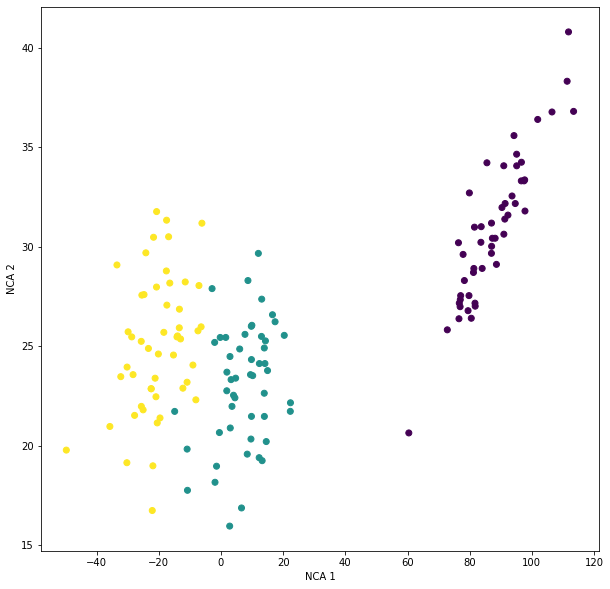

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(Xt_nca[:,0],Xt_nca[:,1],c=y)

plt.xlabel('NCA 1')
plt.ylabel('NCA 2')

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
X, y = load_breast_cancer(return_X_y = True)

In [8]:
X.shape

(569, 30)

In [9]:
np.unique(y)

array([0, 1])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [12]:
X_train.shape

(455, 30)

In [13]:
X_test.shape

(114, 30)

In [14]:
y_train.shape

(455,)

In [15]:
y_test.shape

(114,)

In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [17]:
X.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [18]:
X.std(axis=0)

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [19]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

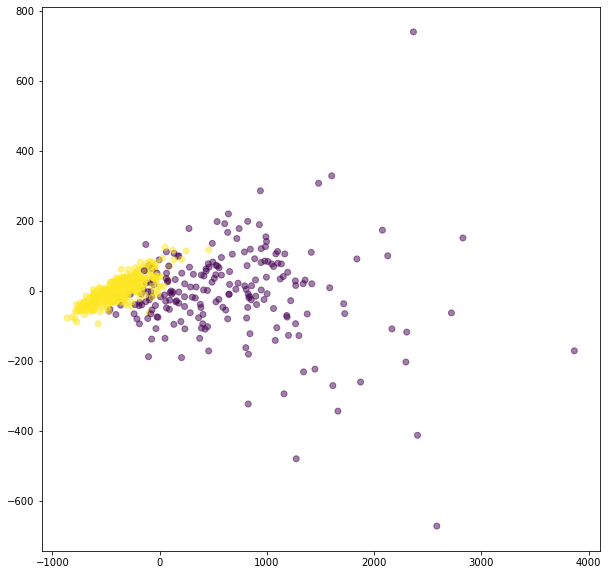

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,alpha=0.5)



In [21]:
knn = KNN(n_neighbors=5).fit(X_train,y_train)

In [22]:
y_pred = knn.predict(X_test)

In [23]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [24]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [25]:
acc=0
for i in range(y_pred.shape[0]):
    if y_pred[i] == y_test[i]:
        acc += 1
acc /= y_pred.shape[0]
print('accuracy is {}'.format(acc))

accuracy is 0.956140350877193


In [26]:
steps = [('preprocess',MaxAbsScaler()),
         ('dimension reduction',PCA(n_components=5)),
         #('dimension reduction',LDA(n_components=1)),
        ('Classifier',KNN(n_neighbors=5)),]
pipeline = Pipeline(steps).fit(X_train,y_train)

In [27]:
y_pred = pipeline.predict(X_test)

In [28]:
acc=0
for i in range(y_pred.shape[0]):
    if y_pred[i] == y_test[i]:
        acc += 1
acc /= y_pred.shape[0]
print('accuracy is {}'.format(acc))

accuracy is 0.9649122807017544
